# Imports

In [9]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

In [227]:
import os 
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from IPython.display import display
from keras.preprocessing.image import array_to_img

from keras.callbacks import TensorBoard
from time import strftime

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from keras.datasets import cifar10

# Constants

In [135]:
LOG_DIR = 'tensorboard_cifar_logs'

LABEL_NAMES = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship',
              'Truck']
TOTAL_INPUTS = 3072

In [60]:
len(LABEL_NAMES)

9

# Get the data

In [19]:
(X_train_all,y_train_all),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 768s 5us/step


In [25]:
X_train_all.shape

(50000, 32, 32, 3)

In [26]:
X_train_all[0].shape

(32, 32, 3)

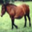

In [31]:
pic = array_to_img(X_train_all[7])
display(pic)

In [43]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

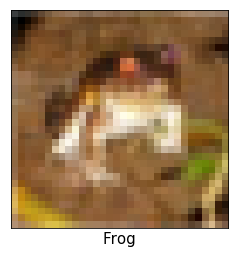

In [59]:
plt.imshow(X_train_all[0])
plt.xlabel(LABEL_NAMES[y_train_all[0][0]],fontsize=15)
plt.yticks([])
plt.xticks([])
plt.show()

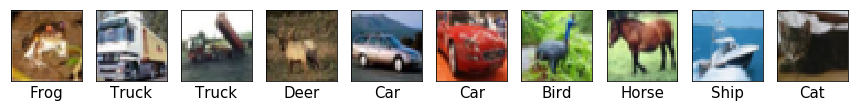

In [81]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1,10,i+1)
    
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]],fontsize=15)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(X_train_all[i])


In [82]:
X_train_all.shape

(50000, 32, 32, 3)

In [83]:
nr_images,x,y,c = X_train_all.shape

In [85]:
print(f'images = {nr_images} \t | width = {x}\t | height ={y} \t |channels = {c}')

images = 50000 	 | width = 32	 | height =32 	 |channels = 3


# Preprocess data

In [93]:
X_train_all[0][0][0]

array([0.23137255, 0.24313725, 0.24705882])

In [90]:
X_train_all,X_test = X_train_all/255.0,X_test/255.0

In [98]:
X_train_all[0][0][0]

array([0.23137255, 0.24313725, 0.24705882])

In [115]:
X_train_all = X_train_all.reshape(X_train_all.shape[0],3072)


In [116]:
X_test = X_test.reshape(X_test.shape[0],3072)

In [118]:
X_train_all.shape

(50000, 3072)

# Create Validation Dataset

In [126]:
x_val = X_train_all[:10000]
y_val = y_train_all[:10000]

In [125]:
x_train = X_train_all[10000:]
y_train = y_train_all[10000:]

In [127]:
y_train.shape

(40000, 1)

### for exampel 

In [128]:
x_train_xs = X_train_all[:1000]
y_train_xs = y_train_all[:1000]

In [129]:
y_train_xs.shape

(1000, 1)

# Define the Neural Network using Keras

In [245]:
model_1 = Sequential([
    
    Dense(units=128,input_dim=TOTAL_INPUTS,activation='relu',name='m1_hidden1'),
    Dense(units=64,activation='relu',name='m1_hidden2'),
    Dense(16,activation='relu',name='m1_hidden3'),
    Dense(10,activation='softmax',name='m1_output')
])

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [246]:
model_2 = Sequential()

model_2.add(Dropout(0.2,seed=42, input_shape = (TOTAL_INPUTS,)))
model_2.add(Dense(128,activation='relu',name='m2_hidden1'))
model_2.add(Dense(64,activation='relu',name='m2_hidden2'))
model_2.add(Dense(16,activation='relu',name='m2_hidden3'))
model_2.add(Dense(10,activation='softmax',name='m2_output'))


model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [247]:
model_3 = Sequential()

model_3.add(Dropout(0.2,seed=42, input_shape = (TOTAL_INPUTS,)))
model_3.add(Dense(128,activation='relu',name='m3_hidden1'))
model_3.add(Dropout(0.25,seed=42))
model_3.add(Dense(64,activation='relu',name='m3_hidden2'))
model_3.add(Dense(16,activation='relu',name='m3_hidden3'))
model_3.add(Dense(10,activation='softmax',name='m3_output'))


model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [192]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


# Tensorboard(visualising learning)

In [212]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%d_%H_%M_%S")}'
    dir_paths = os.path.join(LOG_DIR,folder_name)
    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)


In [205]:
32*32*3*128+128 + (128*64+64)+(64*16+16)+(16*10+10)

402810

In [213]:
folder_name = f'{strftime("%d_%H_%M_%S")}'
dir_paths = os.path.join(LOG_DIR,folder_name)
dir_paths

'tensorboard_cifar_logs\\16_14_07_21'

# Fit the Model

In [221]:
samp_per_bat = 1000


In [248]:
%%time
nr_epoch = 100
model_1.fit(x_train,y_train,callbacks=[get_tensorboard('Model1_XL')],
           batch_size=samp_per_bat,epochs=nr_epoch,verbose=0,
           validation_data=(x_val,y_val))

Successfully created directory
Wall time: 6min 42s


In [249]:
%%time
nr_epoch = 100
model_2.fit(x_train,y_train,callbacks=[get_tensorboard('Model2_XL')],
           batch_size=samp_per_bat,epochs=nr_epoch,verbose=0,
           validation_data=(x_val,y_val))

Successfully created directory
Wall time: 10min 53s


In [250]:
%%time
nr_epoch = 100
model_3.fit(x_train,y_train,callbacks=[get_tensorboard('Model3_XL')],
           batch_size=samp_per_bat,epochs=nr_epoch,verbose=0,
           validation_data=(x_val,y_val))

Successfully created directory
Wall time: 10min 37s


In [253]:
x_val[0].shape


(3072,)

In [255]:
test = np.expand_dims(x_val[0],axis=0)
test.shape

(1, 3072)

In [257]:
model_2.predict(test).sum()

1.0

In [264]:
np.set_printoptions(precision=3)

In [263]:
model_2.predict(test)

array([[2.39e-02, 2.70e-03, 6.58e-02, 2.26e-02, 1.67e-01, 5.39e-02,
        5.91e-01, 7.29e-02, 1.62e-04, 7.80e-04]], dtype=float32)

In [265]:
model_2.predict(x_val).shape

(10000, 10)

In [280]:
model_2.predict_classes(test10)

array([6, 1, 9, 4, 8, 9, 2, 7, 8], dtype=int64)

In [267]:
y_val[0]

array([6], dtype=uint8)

In [308]:
test10 = x_val[0:10]
pred_val = model_2.predict_classes(test10)
pred_val

array([6, 1, 9, 4, 8, 9, 2, 7, 8, 4], dtype=int64)

In [309]:
for i in range(10):
    #print(pred_val)
    
    print(f'The predicted value is {pred_val[i]} and true value is {y_val[i][0]}')

The predicted value is 6 and true value is 6
The predicted value is 1 and true value is 9
The predicted value is 9 and true value is 9
The predicted value is 4 and true value is 4
The predicted value is 8 and true value is 1
The predicted value is 9 and true value is 1
The predicted value is 2 and true value is 2
The predicted value is 7 and true value is 7
The predicted value is 8 and true value is 8
The predicted value is 4 and true value is 3


# Evaluation

In [310]:
model_2.metrics_names

['loss', 'acc']

In [312]:
test_loss,test_acc = model_2.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 241us/step


In [317]:
test_acc,test_loss

(0.5003, 1.4110743154525758)

## Confusion matrics

In [318]:
from sklearn.metrics import confusion_matrix

In [319]:
confu = confusion_matrix(y_test, model_2.predict_classes(X_test))

array([[522,  29,  87,  15,  30,  14,  31,  23, 199,  50],
       [ 32, 557,  20,  29,  18,  15,  15,  27, 112, 175],
       [ 65,  20, 382,  68, 162,  73, 134,  48,  29,  19],
       [ 24,  18, 107, 284,  70, 217, 159,  49,  24,  48],
       [ 46,  17, 152,  46, 440,  31, 140,  81,  37,  10],
       [ 17,  12, 114, 172,  57, 403, 111,  62,  34,  18],
       [  9,  14,  72,  62, 105,  54, 639,  14,  16,  15],
       [ 36,  17,  78,  65,  90,  74,  48, 520,  26,  46],
       [ 86,  54,  22,  22,  20,  23,   6,  13, 700,  54],
       [ 40, 146,  11,  43,  13,  16,  32,  44,  99, 556]], dtype=int64)

In [325]:
confu.max(),confu.min()

(700, 6)

In [324]:
confu.argmax(axis=1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

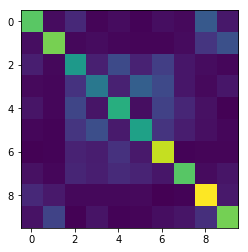

In [326]:
plt.imshow(confu)